In [21]:
import pandas as pd

In [22]:
data = pd.read_csv('../heart.csv')

In [23]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [24]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
6071,62,0,2,130,263,0,0,97,0,1.2,1,1,2,1
6072,58,0,3,100,248,0,2,122,0,1.0,1,0,0,0
6073,59,1,3,138,271,0,2,182,0,0.0,0,0,0,0
6074,56,1,3,130,283,1,2,103,1,1.6,2,0,2,1
6075,50,1,3,150,243,0,2,128,0,2.6,1,0,2,1


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6076 entries, 0 to 6075
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       6076 non-null   int64  
 1   sex       6076 non-null   int64  
 2   cp        6076 non-null   int64  
 3   trestbps  6076 non-null   int64  
 4   chol      6076 non-null   int64  
 5   fbs       6076 non-null   int64  
 6   restecg   6076 non-null   int64  
 7   thalach   6076 non-null   int64  
 8   exang     6076 non-null   int64  
 9   oldpeak   6076 non-null   float64
 10  slope     6076 non-null   int64  
 11  ca        6076 non-null   int64  
 12  thal      6076 non-null   int64  
 13  target    6076 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 664.7 KB


## Split Data

In [26]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Pisahkan fitur dan target
X = data.drop(columns=['target'])
y = data['target']

# Bagi data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalisasi
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Naive Bayes

In [27]:
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, log_loss, f1_score, precision_score, recall_score
import numpy as np

# Inisialisasi k-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# List untuk menampung hasil tiap fold
accuracies = []
log_losses = []
f1_scores = []
precisions = []
recalls = []

# Looping k-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Inisialisasi model Naive Bayes untuk data numerik
    model = GaussianNB()

    # Latih model
    model.fit(X_train, y_train)

    # Prediksi
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)

    # Evaluasi
    accuracies.append(accuracy_score(y_test, y_pred))
    log_losses.append(log_loss(y_test, y_pred_proba))
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))
    precisions.append(precision_score(y_test, y_pred, average='weighted'))
    recalls.append(recall_score(y_test, y_pred, average='weighted'))

# Tampilkan hasil rata-rata
print(f"Accuracy: {np.mean(accuracies):.4f}")
print(f"Log Loss: {np.mean(log_losses):.4f}")
print(f"F1-Score: {np.mean(f1_scores):.4f}")
print(f"Precision: {np.mean(precisions):.4f}")
print(f"Recall: {np.mean(recalls):.4f}")

Accuracy: 0.7138
Log Loss: 0.5787
F1-Score: 0.7136
Precision: 0.7140
Recall: 0.7138


In [28]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

TP = cm[1, 1]  # True Positive (Prediksi 1, sebenarnya 1)
TN = cm[0, 0]  # True Negative (Prediksi 0, sebenarnya 0)
FP = cm[0, 1]  # False Positive (Prediksi 1, sebenarnya 0)
FN = cm[1, 0]  # False Negative (Prediksi 0, sebenarnya 1)

print(f"TP: {TP}, TN: {TN}, FP: {FP}, FN: {FN}")

Confusion Matrix:
[[213  92]
 [ 81 221]]
TP: 221, TN: 213, FP: 92, FN: 81


## Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, log_loss, f1_score, precision_score, recall_score
import numpy as np

# Inisialisasi k-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# List untuk menampung hasil tiap fold
accuracies = []
log_losses = []
f1_scores = []
precisions = []
recalls = []

# Looping k-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Inisialisasi model Random Forest
    model = RandomForestClassifier(n_estimators=100, random_state=42)

    # Latih model
    model.fit(X_train, y_train)

    # Prediksi
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)

    # Evaluasi
    accuracies.append(accuracy_score(y_test, y_pred))
    log_losses.append(log_loss(y_test, y_pred_proba))
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))
    precisions.append(precision_score(y_test, y_pred, average='weighted'))
    recalls.append(recall_score(y_test, y_pred, average='weighted'))

# Tampilkan hasil rata-rata
print(f"Accuracy: {np.mean(accuracies):.4f}")
print(f"Log Loss: {np.mean(log_losses):.4f}")
print(f"F1-Score: {np.mean(f1_scores):.4f}")
print(f"Precision: {np.mean(precisions):.4f}")
print(f"Recall: {np.mean(recalls):.4f}")

Accuracy: 0.9623
Log Loss: 0.0936
F1-Score: 0.9623
Precision: 0.9624
Recall: 0.9623


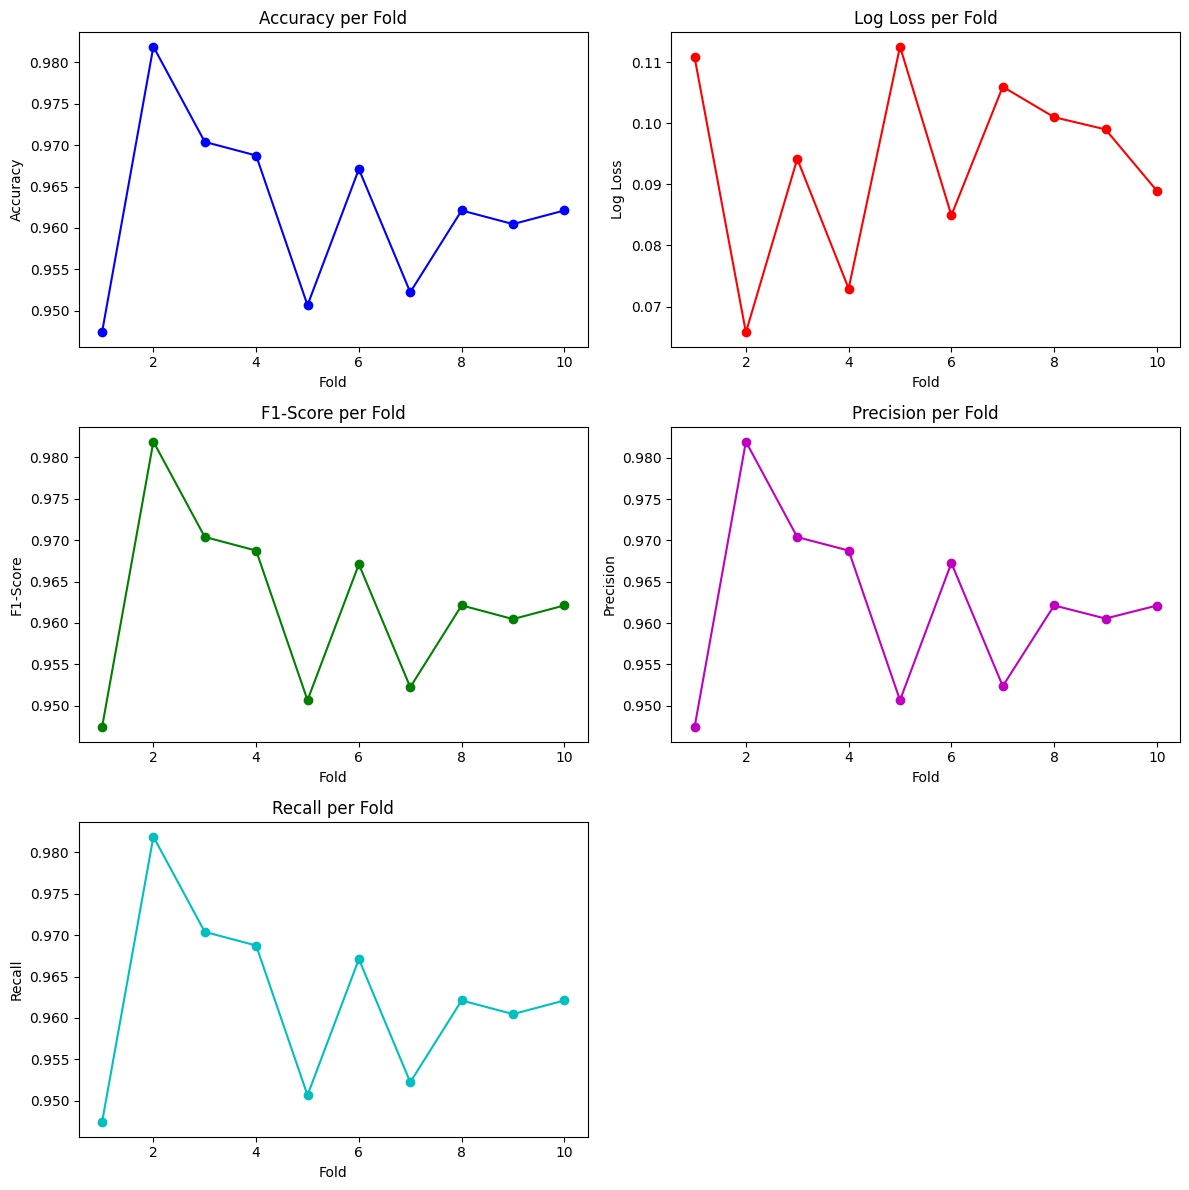


Average Accuracy: 0.9623
Average Log Loss: 0.0936
Average F1-Score: 0.9623
Average Precision: 0.9624
Average Recall: 0.9623


In [30]:
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 2, figsize=(12, 12))

axes[0, 0].plot(range(1, kf.get_n_splits() + 1), accuracies, marker='o', linestyle='-', color='b')
axes[0, 0].set_title("Accuracy per Fold")
axes[0, 0].set_xlabel("Fold")
axes[0, 0].set_ylabel("Accuracy")

axes[0, 1].plot(range(1, kf.get_n_splits() + 1), log_losses, marker='o', linestyle='-', color='r')
axes[0, 1].set_title("Log Loss per Fold")
axes[0, 1].set_xlabel("Fold")
axes[0, 1].set_ylabel("Log Loss")

axes[1, 0].plot(range(1, kf.get_n_splits() + 1), f1_scores, marker='o', linestyle='-', color='g')
axes[1, 0].set_title("F1-Score per Fold")
axes[1, 0].set_xlabel("Fold")
axes[1, 0].set_ylabel("F1-Score")

axes[1, 1].plot(range(1, kf.get_n_splits() + 1), precisions, marker='o', linestyle='-', color='m')
axes[1, 1].set_title("Precision per Fold")
axes[1, 1].set_xlabel("Fold")
axes[1, 1].set_ylabel("Precision")

axes[2, 0].plot(range(1, kf.get_n_splits() + 1), recalls, marker='o', linestyle='-', color='c')
axes[2, 0].set_title("Recall per Fold")
axes[2, 0].set_xlabel("Fold")
axes[2, 0].set_ylabel("Recall")

axes[2, 1].axis('off')

plt.tight_layout()
plt.show()

print(f"\nAverage Accuracy: {np.mean(accuracies):.4f}")
print(f"Average Log Loss: {np.mean(log_losses):.4f}")
print(f"Average F1-Score: {np.mean(f1_scores):.4f}")
print(f"Average Precision: {np.mean(precisions):.4f}")
print(f"Average Recall: {np.mean(recalls):.4f}")

In [31]:
from sklearn.metrics import confusion_matrix

# Setelah prediksi ya, contoh:
y_pred = model.predict(X_test)

# Bikin Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)


TP = cm[1, 1]  # True Positive (Prediksi 1, sebenarnya 1)
TN = cm[0, 0]  # True Negative (Prediksi 0, sebenarnya 0)
FP = cm[0, 1]  # False Positive (Prediksi 1, sebenarnya 0)
FN = cm[1, 0]  # False Negative (Prediksi 0, sebenarnya 1)

print(f"TP: {TP}, TN: {TN}, FP: {FP}, FN: {FN}")

Confusion Matrix:
[[293  12]
 [ 11 291]]
TP: 291, TN: 293, FP: 12, FN: 11


In [38]:
data_baru = np.array([[63, 1, 0, 145, 233, 1, 2, 150, 0, 2.3, 2, 0, 1]])

# Normalisasi
data_baru = scaler.transform(data_baru)

# Prediksi hasil
prediksi = model.predict(data_baru)

if prediksi[0] == 1:
    print("Hasil Prediksi: Berisiko Penyakit Jantung")
else:
    print("Hasil Prediksi: Tidak Berisiko Penyakit Jantung")

Hasil Prediksi: Tidak Berisiko Penyakit Jantung


C:\Users\UMMY\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\UMMY\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# Input data baru (sesuai urutan fitur training)
import numpy as np

data_baru = np.array([[63, 1, 0, 145, 233, 1, 2, 150, 0, 2.3, 2, 0, 1]])  # contoh input

# normalisasi
data_baru = scaler.transform(data_baru)

# Prediksi hasil
prediksi = model.predict(data_baru)

if prediksi[0] == 1:
    print("Hasil Prediksi: Berisiko Penyakit Jantung")
else:
    print("Hasil Prediksi: Tidak Berisiko Penyakit Jantung")

Hasil Prediksi: Tidak Berisiko Penyakit Jantung


C:\Users\UMMY\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\UMMY\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


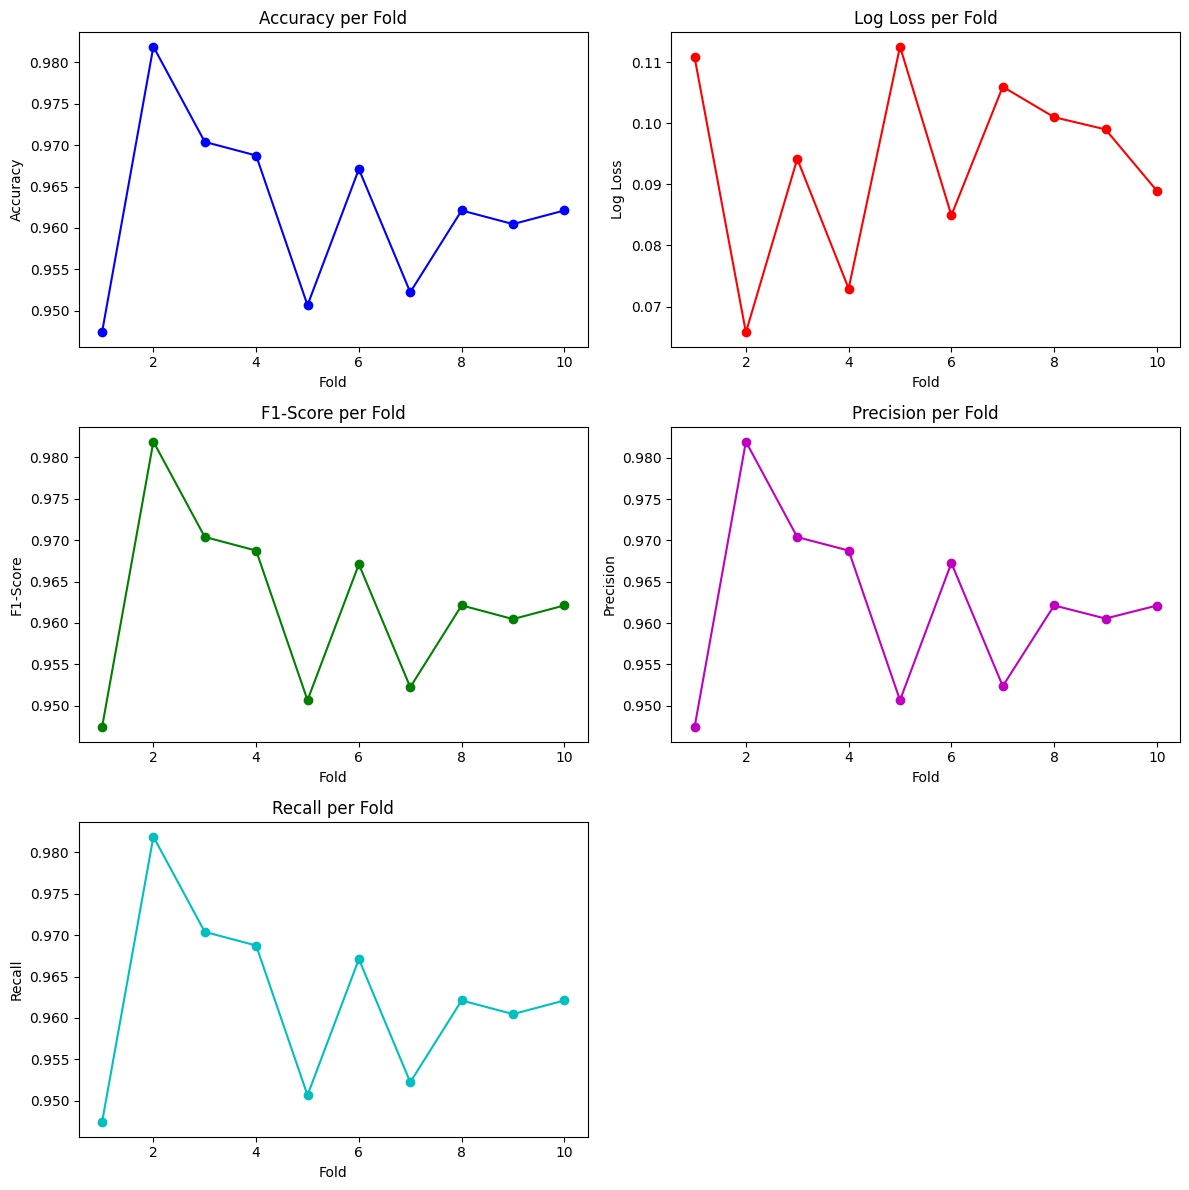


Average Accuracy: 0.9623
Average Log Loss: 0.0936
Average F1-Score: 0.9623
Average Precision: 0.9624
Average Recall: 0.9623


In [35]:
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 2, figsize=(12, 12))

axes[0, 0].plot(range(1, kf.get_n_splits() + 1), accuracies, marker='o', linestyle='-', color='b')
axes[0, 0].set_title("Accuracy per Fold")
axes[0, 0].set_xlabel("Fold")
axes[0, 0].set_ylabel("Accuracy")

axes[0, 1].plot(range(1, kf.get_n_splits() + 1), log_losses, marker='o', linestyle='-', color='r')
axes[0, 1].set_title("Log Loss per Fold")
axes[0, 1].set_xlabel("Fold")
axes[0, 1].set_ylabel("Log Loss")

axes[1, 0].plot(range(1, kf.get_n_splits() + 1), f1_scores, marker='o', linestyle='-', color='g')
axes[1, 0].set_title("F1-Score per Fold")
axes[1, 0].set_xlabel("Fold")
axes[1, 0].set_ylabel("F1-Score")

axes[1, 1].plot(range(1, kf.get_n_splits() + 1), precisions, marker='o', linestyle='-', color='m')
axes[1, 1].set_title("Precision per Fold")
axes[1, 1].set_xlabel("Fold")
axes[1, 1].set_ylabel("Precision")

axes[2, 0].plot(range(1, kf.get_n_splits() + 1), recalls, marker='o', linestyle='-', color='c')
axes[2, 0].set_title("Recall per Fold")
axes[2, 0].set_xlabel("Fold")
axes[2, 0].set_ylabel("Recall")

axes[2, 1].axis('off')

plt.tight_layout()
plt.show()

print(f"\nAverage Accuracy: {np.mean(accuracies):.4f}")
print(f"Average Log Loss: {np.mean(log_losses):.4f}")
print(f"Average F1-Score: {np.mean(f1_scores):.4f}")
print(f"Average Precision: {np.mean(precisions):.4f}")
print(f"Average Recall: {np.mean(recalls):.4f}")

In [36]:
from sklearn.metrics import confusion_matrix

# Setelah prediksi ya, contoh:
y_pred = model.predict(X_test)

# Bikin Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

# Biar lebih jelas
TP = cm[1, 1]  # True Positive (Prediksi 1, sebenarnya 1)
TN = cm[0, 0]  # True Negative (Prediksi 0, sebenarnya 0)
FP = cm[0, 1]  # False Positive (Prediksi 1, sebenarnya 0)
FN = cm[1, 0]  # False Negative (Prediksi 0, sebenarnya 1)

print(f"TP: {TP}, TN: {TN}, FP: {FP}, FN: {FN}")

Confusion Matrix:
[[293  12]
 [ 11 291]]
TP: 291, TN: 293, FP: 12, FN: 11


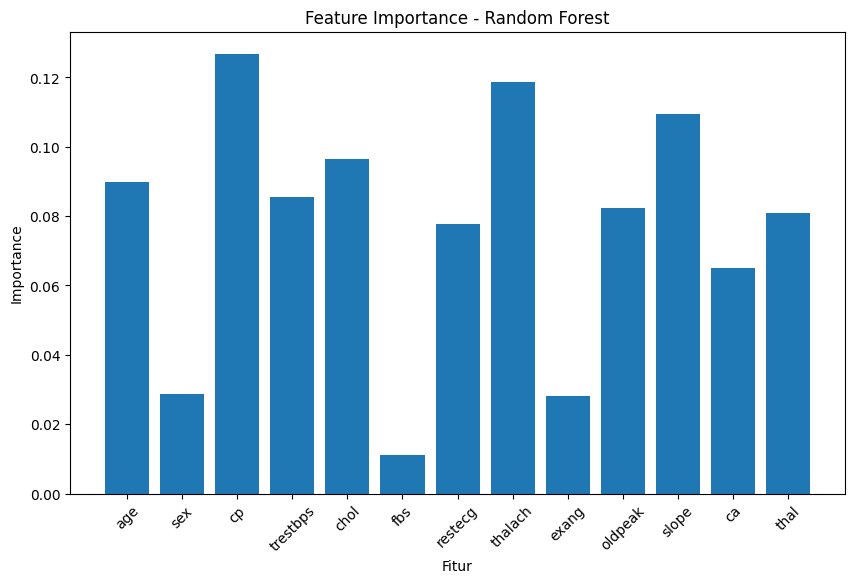

In [37]:
import matplotlib.pyplot as plt

# Dapatkan importance tiap fitur
importances = model.feature_importances_

# Buat plot
plt.figure(figsize=(10, 6))
plt.bar(X_train.columns, importances)
plt.xlabel('Fitur')
plt.ylabel('Importance')
plt.title('Feature Importance - Random Forest')
plt.xticks(rotation=45)
plt.show()
